In [1]:
# Importing pandas
import pandas as pd

In [2]:
# Reading in the data
df = pd.read_csv('cookie_cats.csv')
# Showing the first few rows
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
# Counting the number of players in each AB group.
df.groupby(by='version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


Text(0.5, 1.0, 'Number of Game Rounds Players on the First Week')

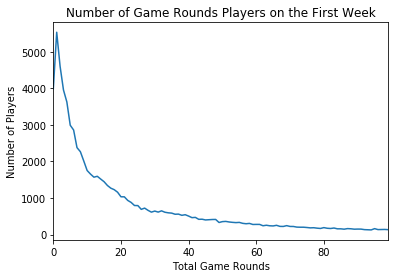

In [5]:
# This command makes plots appear in the notebook
%matplotlib inline

# Counting the number of players for each number of gamerounds 
plot_df = df.groupby(by='sum_gamerounds')['userid'].count()

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(100).plot(x='sum_gamerounds', y='userid')
ax.set_xlabel("Total Game Rounds")
ax.set_ylabel("Number of Players")
ax.set_title("Number of Game Rounds Players on the First Week")

In [6]:
# The % of users that came back the day after they installed
print('The 1-Day Retention Rate: {:f}' .format(df['retention_1'].mean()))


The 1-Day Retention Rate: 0.445210


In [7]:
# Calculating 1-day retention for each AB-group
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

Text(0.5, 1.0, 'The Average of 1-Day Retention for each AB group')

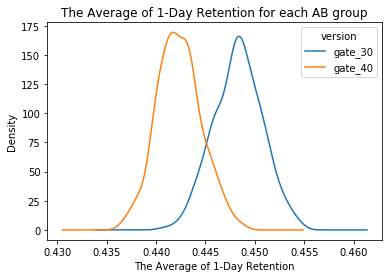

In [8]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
iterations = 500
for i in range(iterations):
    boot_mean = df.sample(frac=1, replace=True).groupby(by='version')['retention_1'].mean()
    boot_1d.append(boot_mean)

# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# Density Estimate plot of the bootstrap distributions
ax = boot_1d.plot.kde()
ax.set_xlabel("The Average of 1-Day Retention")
ax.set_title("The Average of 1-Day Retention for each AB group")

Text(0.5, 0, '% Difference between gate_30 and gate_40 for 1-Day Retention by AB-group ')

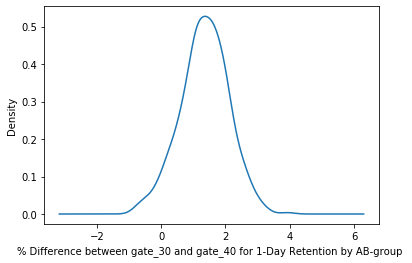

In [9]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = ((boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40'] * 100)

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot.kde()

ax.set_xlabel("% Difference between gate_30 and gate_40 for 1-Day Retention by AB-group ")

In [10]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob = (boot_1d['diff'] > 0).mean()
# Pretty printing the probability
('{:.1%}').format(prob) 

'95.4%'

'84.2%'

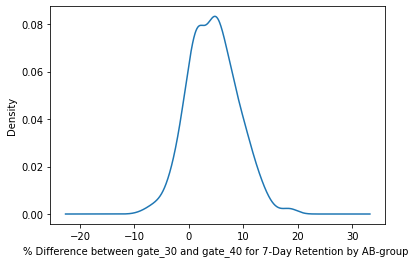

In [11]:
# Creating a list with bootstrapped means for each AB-group
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=0.1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)

# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = ((boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100)
# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot.kde()
ax.set_xlabel("% Difference between gate_30 and gate_40 for 7-Day Retention by AB-group ")
# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob = (boot_7d['diff'] > 0).mean()

# Pretty printing the probability
('{:.1%}').format(prob)

The bootstrap result tells us that there is strong evidence that 7-day retention is higher when the gate is at level 30 than when it is at level 40. The conclusion is: If we want to keep retention high — both 1-day and 7-day retention — we should not move the gate from level 30 to level 40. There are, of course, other metrics we could look at, like the number of game rounds played or how much in-game purchases are made by the two AB-groups. But retention is one of the most important metrics. If we don't retain our player base, it doesn't matter how much money they spend in-game

So, why is retention higher when the gate is positioned earlier? One could expect the opposite: The later the obstacle, the longer people are going to engage with the game. But this is not what the data tells us. The theory of hedonic adaptation can give one explanation for this. In short, hedonic adaptation is the tendency for people to get less and less enjoyment out of a fun activity over time if that activity is undertaken continuously. By forcing players to take a break when they reach a gate, their enjoyment of the game is prolonged. But when the gate is moved to level 40, fewer players make it far enough, and they are more likely to quit the game because they simply got bored of it.

In [12]:
# Should we move the gate from level 30 to level 40 ?
move_to_level_40 = False